In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Set the path to the style file
plt.style.use("../colibristyle_colorblind.mplstyle")

In [ ]:
range_wmin_params = range(38,51)

wmin_basis_name = "250612_analytic_L1_fs_123_Nw_" 
wmin_basis_name_num = "250612_disonly_L1_fs_123_Nw_"

wmin_basis_fits = [f"{wmin_basis_name}{i}" for i in range_wmin_params]
wmin_basis_fits_num = [f"{wmin_basis_name_num}{i}" for i in range_wmin_params]

In [33]:
dfs_wmin = []
dfs_wmin_num = []


for wmin, wmin_num in zip(wmin_basis_fits, wmin_basis_fits_num):
    df_wmin = pd.read_csv("../analytical/" + wmin + "/bayes_metrics.csv")
    df_num = pd.read_csv(wmin_num + "/bayes_metrics.csv")
    
    df_wmin.index = pd.Index([wmin.split('_')[-1]], name="Nr weights")
    df_num.index = pd.Index([wmin.split('_')[-1]], name="Nr weights")
    
    dfs_wmin.append(df_wmin)
    dfs_wmin_num.append(df_num)
    
df_wmin = pd.concat(dfs_wmin, axis=0)
df_num = pd.concat(dfs_wmin_num, axis=0)

In [34]:
print(df_num)
df_wmin["logz_tot"] = df_wmin['logz'] + df_num['logz']
# df_wmin["logz_tot2"] = df_wmin['logz'] + df_num2['logz']

            bayes_complexity    avg_chi2  min_chi2     logz
Nr weights                                                 
38                 15.485162  816.484825   801.000 -427.216
39                 12.948440  807.573796   794.625 -417.714
40                 13.161871  807.284990   794.123 -417.904
41                 13.083912  807.756337   794.672 -418.765
42                 13.041828  808.782027   795.740 -419.838
43                 14.016820  805.808682   791.792 -420.708
44                 12.741850  803.470726   790.729 -419.110
45                 13.419613  803.238638   789.819 -419.923
46                 13.678955  802.305948   788.627 -419.911
47                 14.363383  802.611644   788.248 -420.045
48                 14.722004  802.397876   787.676 -420.769
49                 14.718593  803.686961   788.968 -421.335
50                 14.334168  803.549433   789.215 -422.327


In [35]:
# Take all models that have logZ \in [logZmax, logZ - Delta(logZ)]
delta_logZ = 4.0

wmin_models_idx = np.where(df_wmin['logz_tot'] > df_wmin['logz_tot'].max() - delta_logZ)[0]
print(wmin_models_idx)
wmin_models_logZ = df_wmin['logz_tot'].values[wmin_models_idx]

min_logZ_wmin = np.min(wmin_models_logZ)
max_logZ_wmin = np.max(wmin_models_logZ)


[1 2]


In [36]:
print(wmin_models_idx+1)

[2 3]


In [37]:
df_wmin['logz_tot'][wmin_models_idx]

/var/folders/h8/rpdyzfjj6bv49nxrm1s22g1c0000gn/T/ipykernel_69931/3466318016.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_wmin['logz_tot'][wmin_models_idx]


Nr weights
39   -1567.955335
40   -1570.609970
Name: logz_tot, dtype: float64

In [45]:
p39 = np.exp(-1567.955335 + 1570.609970) / (1 + np.exp(-1567.955335 + 1570.609970))
p40 = np.exp(+1567.955335 - 1570.609970) / (1 + np.exp(+1567.955335 - 1570.609970))
print(f"p39: {p39}, p40: {p40}")

p39: 0.9342960921987778, p40: 0.06570390780122212


### LogZ plot

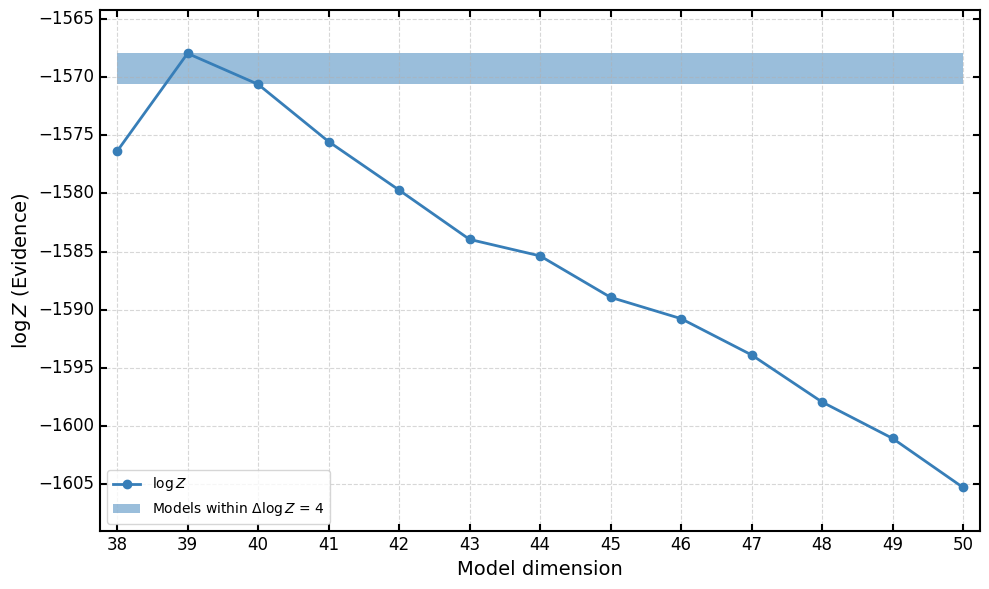

In [50]:
# Define a custom style for publication-ready plots
fig, ax = plt.subplots(figsize=(10, 6), dpi=100)  # Higher DPI for publication

# Plot each dataset with customized line styles
ax.plot(df_wmin.index, df_wmin['logz_tot'], marker='o', linestyle='-', label=r'$\log{Z}$')
ax.fill_between(df_wmin.index, min_logZ_wmin, max_logZ_wmin, alpha=0.5, label=r'Models within $\Delta \log Z$ = 4')

# Label axes with larger, more readable font
ax.grid(True, linestyle="--", alpha=0.5)

ax.set_xlabel("Model dimension", fontsize=14)
ax.set_ylabel(r"$\log{Z}$ (Evidence)", fontsize=14)

# Customize ticks for better readability
ax.tick_params(axis="both", which="major", labelsize=12)

ax.margins(x=0.02)
ax.legend()
# Save the figure with publication quality
fig.tight_layout()
fig.savefig("logz_l1_ct_scan.pdf", bbox_inches="tight")



